Trial 1 :-With preprocessing Normalization, All 3 Convolutional Layers with Same HyperParameters 
 Activitation Function - Relu, Optimizer - Adam, Loss function - mean_squared_error.
 Batch Size = 32, Epochs = 3. Time Taken for Whole execution is approximately around 3 to 5 minutes
 
 Also the detailed logging of the training process is Shown Below: 
Epoch 1/3
1875/1875 [==============================] - 55s 28ms/step - loss: 0.0130 - accuracy: 0.9109 - val_loss: 0.0066 - val_accuracy: 0.9577
Epoch 2/3
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0051 - accuracy: 0.9668 - val_loss: 0.0038 - val_accuracy: 0.9757
Epoch 3/3
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0040 - accuracy: 0.9748 - val_loss: 0.0036 - val_accuracy: 0.9758

Training accuracy: 0.9747662544250488
313/313 [==============================] - 2s 6ms/step

 Confusion Matrix:
[[ 960    1    4    1    2    3    4    4    1    0]
 [   0 1125    1    4    0    2    0    3    

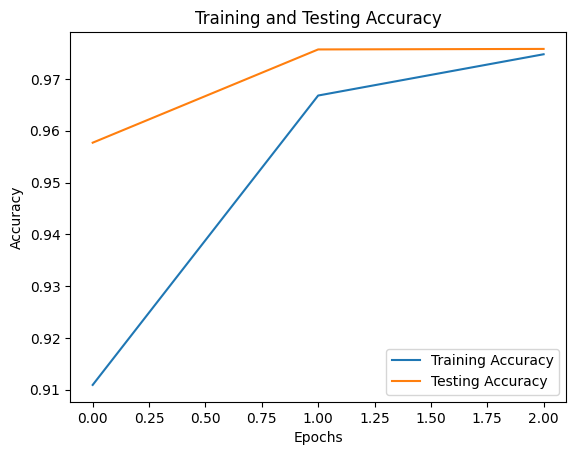

In [3]:
print("Trial 1 :-With preprocessing Normalization, All 3 Convolutional Layers with Same HyperParameters \n Activitation Function - Relu, Optimizer - Adam, Loss function - mean_squared_error.\n Batch Size = 32, Epochs = 3. Time Taken for Whole execution is approximately around 3 to 5 minutes\n \n Also the detailed logging of the training process is Shown Below: ")

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, utils
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Function to load and preprocess the data
def load_mnist_data(train_path, test_path):
    # Load the data
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)

    # Separate features and labels
    train_labels = train_df.iloc[:, 0].values
    train_image_pixcels = train_df.iloc[:, 1:].values
    test_labels = test_df.iloc[:, 0].values
    test_image_pixcels = test_df.iloc[:, 1:].values

    # Reshape images to (28, 28, 1)
    train_image_pixcels = train_image_pixcels.reshape(-1, 28, 28, 1)
    test_image_pixcels = test_image_pixcels.reshape(-1, 28, 28, 1)

    # Normalize the pixel values to [0, 1]
    train_image_pixcels = train_image_pixcels.astype('float32') / 255
    test_image_pixcels = test_image_pixcels.astype('float32') / 255

    # Convert labels to one-hot encoded vectors
    train_labels = utils.to_categorical(train_labels, 10)
    test_labels = utils.to_categorical(test_labels, 10)

    return (train_image_pixcels, train_labels), (test_image_pixcels, test_labels)

# Load the MNIST data from local CSV files
train_path = '/content/drive/MyDrive/mnist_train.csv'
test_path = '/content/drive/MyDrive/mnist_test.csv'
(train_image_pixcels, train_labels), (test_image_pixcels, test_labels) = load_mnist_data(train_path, test_path)

#-------------------CNN Architecture-------------------
# Define the CNN model
model = models.Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #The input_shape=(28, 28, 1) parameter specifies the shape of the input data, where each image is 28x28 pixels with a single channel (grayscale) this is the input layer of the neural network.
model.add(layers.MaxPooling2D((2, 2)))   #Pooling Layer

# Second Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) #Pooling Layer

# Third Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) #Pooling Layer

# Flatten Layer
model.add(layers.Flatten())

# Fully Connected Layer
model.add(layers.Dense(64, activation='relu'))

# Output Layer
model.add(layers.Dense(10, activation='softmax'))


# Compile the model with Mean Squared Error (MSE) as the loss function
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_image_pixcels, train_labels, epochs=3, #epochs parameter specifies how many times the training process will iterate over the entire training dataset.
                    validation_data=(test_image_pixcels, test_labels),
                    verbose=1, batch_size=32)#If not specified, it uses a default batch size of 32 and verbose - gives training Data logging if not mentioned takes default as 1


# Print the final training accuracy
train_accuracy = history.history['accuracy'][-1]
print(f'\nTraining accuracy: {train_accuracy}')

# Evaluate the model
#test_loss, test_acc = model.evaluate(test_image_pixcels, test_labels, verbose=2)
#print(f'\nTest accuracy: {test_acc}') #This Test Accuracy and Accuracy calculated from confusion matrix is same as data set is same

# Predict classes for test set
test_predictions = model.predict(test_image_pixcels)
test_predictions_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(test_labels, axis=1)

#-------------------Evalution Parameters-------------------

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_true_classes, test_predictions_classes)
# Print confusion matrix
print("\n Confusion Matrix:")
print(conf_matrix)

# overall accuracy
accuracy = accuracy_score(test_true_classes, test_predictions_classes)
print("\n Accuracy:", accuracy)

# Precession for each class
precision = precision_score(test_true_classes, test_predictions_classes, average=None)
print("\n Precision for each class:")
print(precision)

# Macroaverage precision
macro_precision = precision_score(test_true_classes, test_predictions_classes, average='macro')
print("\n Macroaverage Precision:", macro_precision)


# Recall for each class
recall = recall_score(test_true_classes, test_predictions_classes, average=None)
print("\n Recall for each class:")
print(recall)

# Macroaverage recall
macro_recall = recall_score(test_true_classes, test_predictions_classes, average='macro')
print("\n Macroaverage Recall:", macro_recall)


# F1 score for each class
f1 = f1_score(test_true_classes, test_predictions_classes, average=None)
print("\n F1 score for each class:")
print(f1)


# Macroaverage F1 score
macro_f1 = f1_score(test_true_classes, test_predictions_classes, average='macro')
print("\n Macroaverage F1 Score:\n", macro_f1,"\n")


# Plotting training and testing accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()
